# Keypoint detection, Feature description and matching

In this notebook, I demonstrate how to use OpenCV's feature detection, description and matching framework.

## Package inclusion for Python

In [1]:
%matplotlib inline

import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Open two images

### Left image

![Left image](./_IGP8266.JPG)
    
### Right image

![Right image](./_IGP8267.JPG)    

In [2]:
img1 = cv2.imread("_IGP8266.JPG", cv2.IMREAD_COLOR)
img2 = cv2.imread("_IGP8267.JPG", cv2.IMREAD_COLOR)

### Any error? Is the data loaded?

In [3]:
if img1 is None: 
    raise Exception("Could not open or find the image")
    
if img2 is None: 
    raise Exception("Could not open or find the image")

Text(0.5, 1.0, 'Right Image')

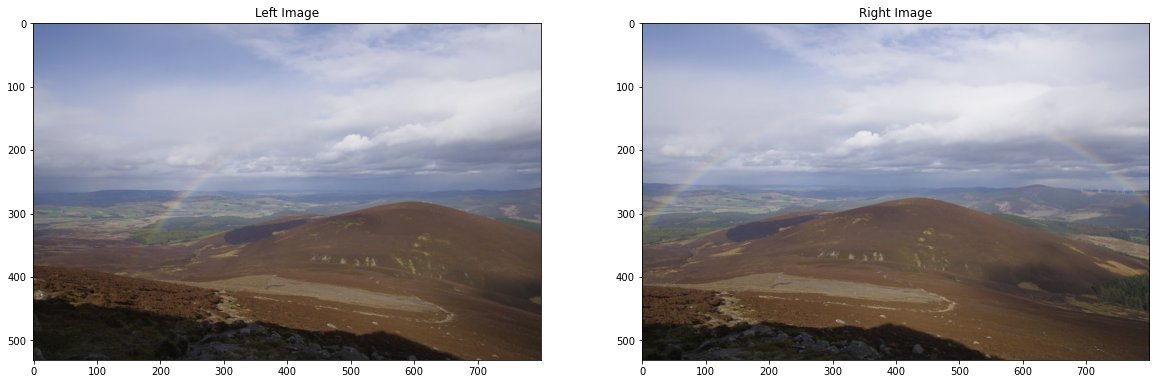

In [4]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1, 2, 1)
im_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
ax1.imshow(im_rgb)
plt.title("Left Image")

ax2 = fig.add_subplot(1, 2, 2)
im_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
ax2.imshow(im_rgb)
plt.title("Right Image")

## 1. Detect

Create a feature detector, here a ORB feature detector.

In [5]:
detector = cv2.ORB.create()

Detect keypoints in `img1` and `img2`.

In [6]:
keypoints1 = detector.detect(img1)
keypoints2 = detector.detect(img2)

## 2. Describe

Create a feature descriptor, here a ORB feature descriptor

In [7]:
extractor = cv2.ORB.create()

Create the feature vector for the keypoints.

In [8]:
descriptors1 = extractor.compute(img1, keypoints1)
descriptors2 = extractor.compute(img2, keypoints2)

Text(0.5, 1.0, 'Descriptors of the keypoints of the right image')

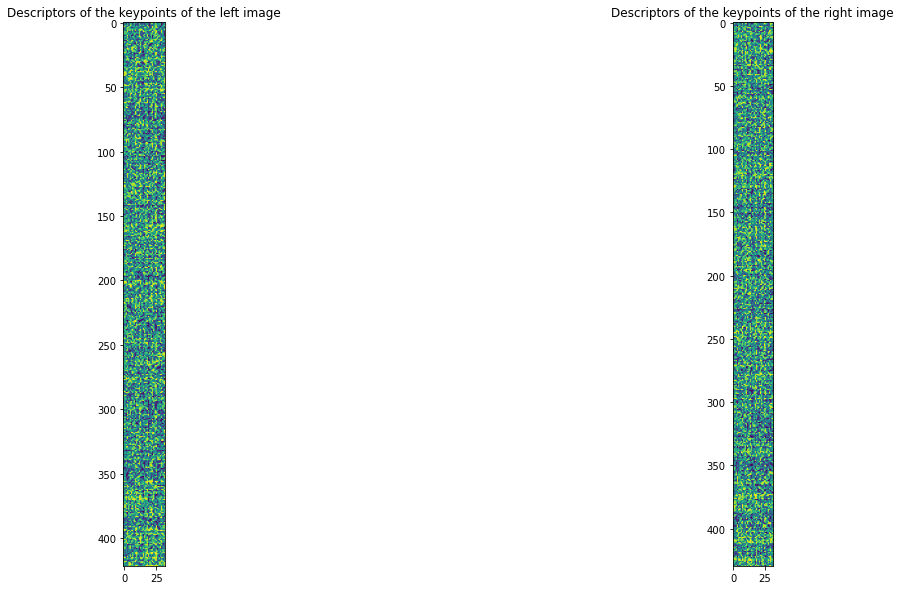

In [9]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(descriptors1[1])
plt.title("Descriptors of the keypoints of the left image")

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(descriptors2[1])
plt.title("Descriptors of the keypoints of the right image")

## 3. Match

Match keypoints in `img1` and `img2` by comparing their corresponding feature vectors. Here we use a brute-force algorithm and the L2-norm.

In [10]:
matcher = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = matcher.match(descriptors1[1], descriptors2[1])

## 4. Find the good matches

Filter the matches (only keep those with a small distance). 1st find the min and max distances between keypoints

In [11]:
max_dist = -sys.float_info.max
min_dist = sys.float_info.max

for i in range(len(matches)):

    dist = matches[i].distance
    min_dist = min(min_dist, dist)
    max_dist = max(max_dist, dist)

Use only "good" matches (i.e. whose distance is less than a threshold, e.g. the middle distance).

In [12]:
def filterMatches(value):

    global min_dist, max_dist
    global matches
    global img_matches
    global img1, keypoints1
    global img2, keypoints2
    
    good_matches = []
    threshold_distance = min_dist + (max_dist - min_dist) * value / 100.0

    for i in range(len(matches)):

        dist = matches[i].distance

        if dist < threshold_distance:
            good_matches.append(matches[i])

    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None)
    cv2.imshow("matches", img_matches)

In [13]:
img_matches = None
threshold_distance = 50

filterMatches(threshold_distance)

## 5. Draw the results

Text(0.5, 1.0, 'Matches')

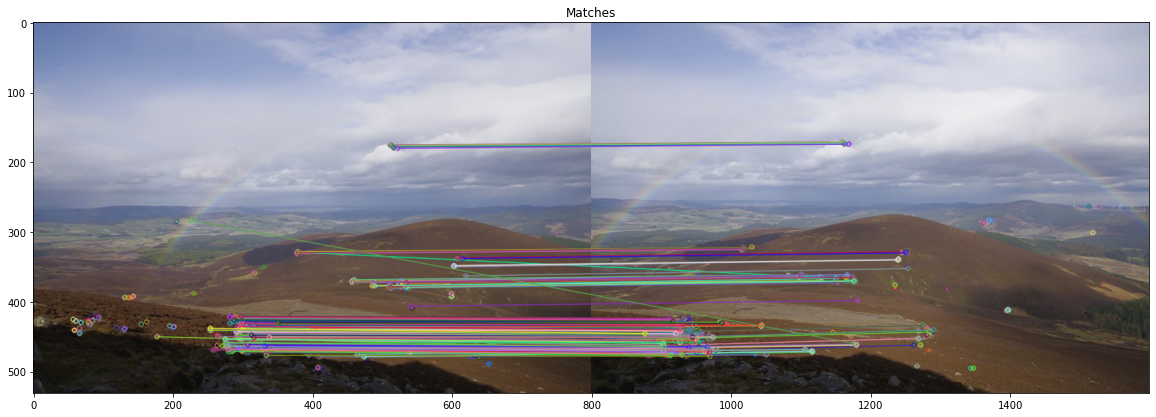

In [14]:
fig = plt.figure(figsize=(20, 10))
im_rgb = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.title("Matches")

We could control the threshold using a trackbar.

Create a callback for the trackbar to control the threshold

In [15]:
cv2.imshow("matches", img_matches)
cv2.createTrackbar("Threshold: ", "matches", 50, 100, filterMatches)
cv2.waitKey(0)

27

When we increase the threshold there are wrong matches (called false positives).

![Matches with false positives](match2.png)
    
When we decrease the threshold the false positives disapear as only strong matches remain.

![Strong matches](match3.png)

In [16]:
cv2.destroyAllWindows()